In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,2:3] #Glucose
X2 = dataset[:,7:8] #Resistin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,1:2] #BMI
X5 = dataset[:,4:5] #HOMA
X6 = dataset[:,5:6] #Leptin
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 10ms/step - loss: 0.7012 - acc: 0.5217 - auc_1: 0.5371 - val_loss: 0.6679 - val_acc: 0.6667 - val_auc_1: 0.6857
Epoch 2/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6725 - acc: 0.5978 - auc_1: 0.6167 - val_loss: 0.6336 - val_acc: 0.7083 - val_auc_1: 0.6964
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6517 - acc: 0.6304 - auc_1: 0.6848 - val_loss: 0.6037 - val_acc: 0.6250 - val_auc_1: 0.7321
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6196 - acc: 0.6087 - auc_1: 0.7267 - val_loss: 0.5773 - val_acc: 0.7500 - val_auc_1: 0.7643
Epoch 5/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5869 - acc: 0.6739 - auc_1: 0.7721 - val_loss: 0.5362 - val_acc: 0.7500 - val_auc_1: 0.8071
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5659 - acc: 0.6739 - auc_1: 0.7769 - val_loss

92/92 [==============================] - 0s 3ms/step - loss: 0.4750 - acc: 0.7717 - auc_1: 0.8474 - val_loss: 0.6011 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4645 - acc: 0.7826 - auc_1: 0.8626 - val_loss: 0.5065 - val_acc: 0.7917 - val_auc_1: 0.9036
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4817 - acc: 0.7609 - auc_1: 0.8488 - val_loss: 0.5619 - val_acc: 0.7083 - val_auc_1: 0.8821
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4734 - acc: 0.8043 - auc_1: 0.8533 - val_loss: 0.6576 - val_acc: 0.6667 - val_auc_1: 0.8821
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4750 - acc: 0.7717 - auc_1: 0.8529 - val_loss: 0.5728 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4704 - acc: 0.7609 - auc_1: 0.8533 - val_loss: 0.5557 - val_acc: 0.7917 - val_auc_1: 0.8786
Epoch

Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4195 - acc: 0.7717 - auc_1: 0.8879 - val_loss: 0.5746 - val_acc: 0.6250 - val_auc_1: 0.8357
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4078 - acc: 0.8152 - auc_1: 0.9000 - val_loss: 0.5714 - val_acc: 0.6250 - val_auc_1: 0.8357
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4036 - acc: 0.8152 - auc_1: 0.8998 - val_loss: 0.5604 - val_acc: 0.6667 - val_auc_1: 0.8357
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4073 - acc: 0.8043 - auc_1: 0.8967 - val_loss: 0.5581 - val_acc: 0.6667 - val_auc_1: 0.8357
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4088 - acc: 0.8152 - auc_1: 0.8895 - val_loss: 0.6077 - val_acc: 0.6250 - val_auc_1: 0.8357
Epoch 103/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3930 - acc: 0.8478 - auc_1: 0.9069 - val_loss: 0.5853 - val_acc: 0.6667 - val_au

92/92 [==============================] - 0s 3ms/step - loss: 0.3463 - acc: 0.8370 - auc_1: 0.9243 - val_loss: 0.4755 - val_acc: 0.7083 - val_auc_1: 0.8321
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3353 - acc: 0.8370 - auc_1: 0.9310 - val_loss: 0.4771 - val_acc: 0.6667 - val_auc_1: 0.8500
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3319 - acc: 0.8478 - auc_1: 0.9317 - val_loss: 0.4627 - val_acc: 0.6250 - val_auc_1: 0.8643
Epoch 149/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3276 - acc: 0.8478 - auc_1: 0.9371 - val_loss: 0.4266 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 150/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3447 - acc: 0.8261 - auc_1: 0.9252 - val_loss: 0.4347 - val_acc: 0.7083 - val_auc_1: 0.8679
Epoch 151/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3289 - acc: 0.8696 - auc_1: 0.9345 - val_loss: 0.4708 - val_acc: 0.6667 - val_auc_1: 0.8429


92/92 [==============================] - 0s 5ms/step - loss: 0.2403 - acc: 0.9239 - auc_1: 0.9669 - val_loss: 0.6569 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 195/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2220 - acc: 0.9348 - auc_1: 0.9724 - val_loss: 0.6926 - val_acc: 0.5833 - val_auc_1: 0.7536
Epoch 196/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2236 - acc: 0.9239 - auc_1: 0.9736 - val_loss: 0.6928 - val_acc: 0.6250 - val_auc_1: 0.7500
Epoch 197/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2321 - acc: 0.9022 - auc_1: 0.9674 - val_loss: 0.6992 - val_acc: 0.6250 - val_auc_1: 0.7571
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2204 - acc: 0.9130 - auc_1: 0.9726 - val_loss: 0.6860 - val_acc: 0.7083 - val_auc_1: 0.7429
Epoch 199/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2203 - acc: 0.9239 - auc_1: 0.9748 - val_loss: 0.7821 - val_acc: 0.5833 - val_auc_1: 0.7429


92/92 [==============================] - 0s 3ms/step - loss: 0.1535 - acc: 0.9348 - auc_1: 0.9881 - val_loss: 1.1401 - val_acc: 0.5833 - val_auc_1: 0.6714
Epoch 243/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1446 - acc: 0.9457 - auc_1: 0.9905 - val_loss: 1.1481 - val_acc: 0.6250 - val_auc_1: 0.6893
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1395 - acc: 0.9565 - auc_1: 0.9907 - val_loss: 1.1110 - val_acc: 0.6250 - val_auc_1: 0.7143
Epoch 245/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1347 - acc: 0.9457 - auc_1: 0.9910 - val_loss: 1.1787 - val_acc: 0.6250 - val_auc_1: 0.7143
Epoch 246/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1428 - acc: 0.9457 - auc_1: 0.9893 - val_loss: 1.1736 - val_acc: 0.5833 - val_auc_1: 0.7036
Epoch 247/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1392 - acc: 0.9565 - auc_1: 0.9910 - val_loss: 1.1895 - val_acc: 0.6250 - val_auc_1: 0.7000


92/92 [==============================] - 0s 3ms/step - loss: 0.1003 - acc: 0.9674 - auc_1: 0.9957 - val_loss: 1.6852 - val_acc: 0.6250 - val_auc_1: 0.6750
Epoch 291/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1119 - acc: 0.9457 - auc_1: 0.9940 - val_loss: 1.6395 - val_acc: 0.6250 - val_auc_1: 0.6679
Epoch 292/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1086 - acc: 0.9674 - auc_1: 0.9936 - val_loss: 1.6742 - val_acc: 0.5833 - val_auc_1: 0.6607
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0907 - acc: 0.9457 - auc_1: 0.9971 - val_loss: 1.7327 - val_acc: 0.5833 - val_auc_1: 0.6786
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1079 - acc: 0.9674 - auc_1: 0.9952 - val_loss: 1.5600 - val_acc: 0.6250 - val_auc_1: 0.7000
Epoch 295/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0872 - acc: 0.9457 - auc_1: 0.9967 - val_loss: 1.5397 - val_acc: 0.7083 - val_auc_1: 0.6714


92/92 [==============================] - 0s 4ms/step - loss: 0.0558 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 2.2477 - val_acc: 0.5833 - val_auc_1: 0.6607
Epoch 339/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 2.2479 - val_acc: 0.6250 - val_auc_1: 0.6429
Epoch 340/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0566 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 2.2168 - val_acc: 0.6250 - val_auc_1: 0.6357
Epoch 341/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0421 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2523 - val_acc: 0.5833 - val_auc_1: 0.6429
Epoch 342/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0351 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.3236 - val_acc: 0.5833 - val_auc_1: 0.6679
Epoch 343/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0354 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2482 - val_acc: 0.6250 - val_auc_1: 0.6643


92/92 [==============================] - 0s 3ms/step - loss: 0.0203 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.8381 - val_acc: 0.6250 - val_auc_1: 0.6286
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0311 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 2.8074 - val_acc: 0.6250 - val_auc_1: 0.6536
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0296 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.7382 - val_acc: 0.6250 - val_auc_1: 0.6821
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0281 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 2.5817 - val_acc: 0.6667 - val_auc_1: 0.6929
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0152 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.7749 - val_acc: 0.6667 - val_auc_1: 0.6464
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0181 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.8293 - val_acc: 0.6667 - val_auc_1: 0.6786


92/92 [==============================] - 0s 3ms/step - loss: 0.0076 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.1733 - val_acc: 0.6667 - val_auc_1: 0.6607
Epoch 435/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0070 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.2055 - val_acc: 0.6667 - val_auc_1: 0.6429
Epoch 436/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.1476 - val_acc: 0.6667 - val_auc_1: 0.6464
Epoch 437/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0073 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.2404 - val_acc: 0.6667 - val_auc_1: 0.6679
Epoch 438/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.2850 - val_acc: 0.6667 - val_auc_1: 0.6429
Epoch 439/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.2582 - val_acc: 0.6667 - val_auc_1: 0.6429


92/92 [==============================] - 0s 3ms/step - loss: 0.0369 - acc: 0.9891 - auc_1: 0.9993 - val_loss: 3.3750 - val_acc: 0.6250 - val_auc_1: 0.6429
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0087 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3311 - val_acc: 0.6667 - val_auc_1: 0.6429
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3351 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0058 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3279 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 486/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3371 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3300 - val_acc: 0.6667 - val_auc_1: 0.6571


92/92 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.3930 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 531/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.4039 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 532/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.4131 - val_acc: 0.6667 - val_auc_1: 0.6429
Epoch 533/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.4189 - val_acc: 0.6667 - val_auc_1: 0.6429
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0034 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.4195 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 535/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.4336 - val_acc: 0.6667 - val_auc_1: 0.6571


92/92 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6314 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6283 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 580/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0027 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6445 - val_acc: 0.6250 - val_auc_1: 0.6286
Epoch 581/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6492 - val_acc: 0.6250 - val_auc_1: 0.6286
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6648 - val_acc: 0.6250 - val_auc_1: 0.6286
Epoch 583/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0027 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.6683 - val_acc: 0.6250 - val_auc_1: 0.6286


92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8353 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 627/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8345 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8594 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8689 - val_acc: 0.6667 - val_auc_1: 0.6286
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8898 - val_acc: 0.6667 - val_auc_1: 0.62860
Epoch 631/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 3.8968 - val_acc: 0.6667 - val_auc_1: 0.6286

92/92 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0062 - val_acc: 0.6250 - val_auc_1: 0.6143
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0158 - val_acc: 0.6250 - val_auc_1: 0.6143
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0238 - val_acc: 0.6250 - val_auc_1: 0.6143
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0015 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0234 - val_acc: 0.6250 - val_auc_1: 0.6143
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0261 - val_acc: 0.6250 - val_auc_1: 0.6286
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 4.0329 - val_acc: 0.6250 - val_auc_1: 0.6286


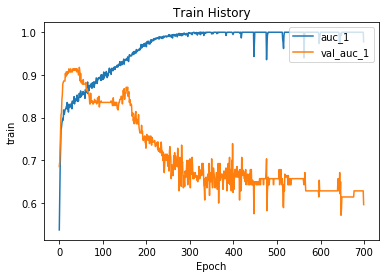

[array([[-0.3539375 ,  1.4574825 , -1.3984326 , -1.7422614 ,  0.77525973,
         0.32581776, -1.854485  , -0.32874966, -1.0180762 ],
       [-2.2428496 ,  1.1981136 , -2.1536317 , -0.70439345,  2.3897583 ,
         2.0117075 , -0.895505  , -2.84111   , -0.35768384],
       [-0.3430082 ,  0.28651723,  0.96557826, -0.05320362, -0.42069128,
        -1.3236469 ,  0.9421339 , -0.26070285, -1.15709   ],
       [-0.01479406,  0.6975072 , -0.35596308,  0.5709444 ,  0.07928512,
        -0.2081285 ,  0.5476457 , -0.27274585,  0.28548294],
       [-1.4854932 , -0.9448329 , -0.01771419, -0.5483812 , -2.4399772 ,
         0.14348221,  1.8360932 , -0.59490436, -0.7277425 ],
       [ 0.07919658,  0.51057214,  0.45716843, -0.8273323 ,  1.0540177 ,
        -1.1777974 , -0.9464421 ,  0.21303858,  0.92359364]],
      dtype=float32), array([ 0.6552688 , -0.93210495,  0.22125748,  0.42383447, -0.34934837,
        0.3076459 , -0.07846736,  0.6623073 ,  0.3979036 ], dtype=float32), array([[ 0.1925526 , -1.

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6])
print(predictions)

[[5.6840980e-07]
 [1.0000000e+00]
 [7.4960959e-01]
 [1.4291035e-06]
 [4.8562627e-02]
 [1.0000000e+00]
 [9.9999702e-01]
 [1.0000000e+00]
 [5.1782001e-07]
 [9.9999976e-01]
 [5.8749337e-02]
 [1.3186997e-04]
 [9.9999988e-01]
 [1.2603819e-03]
 [9.8665843e-08]
 [9.9960142e-01]
 [3.4391901e-01]
 [9.9999070e-01]
 [9.9999821e-01]
 [9.9982530e-01]
 [6.8669695e-05]
 [3.6255624e-08]
 [9.9979371e-01]
 [9.8641866e-01]
 [9.9999988e-01]
 [9.9865603e-01]
 [9.9989831e-01]
 [9.9989772e-01]
 [9.9995136e-01]
 [1.0000000e+00]
 [1.3198385e-01]
 [9.9974269e-01]
 [9.9990821e-01]
 [9.9941421e-01]
 [1.4977418e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999988e-01]
 [2.3127701e-04]
 [9.9999988e-01]
 [9.9999917e-01]
 [9.9951696e-01]
 [4.9422558e-02]
 [8.4145715e-05]
 [7.8139585e-08]
 [9.9998593e-01]
 [1.6798649e-03]
 [1.0000000e+00]
 [9.3865401e-01]
 [3.3485960e-06]
 [9.9962175e-01]
 [4.1478936e-02]
 [9.1381319e-04]
 [5.5618457e-06]
 [6.6289090e-06]
 [4.8977468e-04]
 [1.4911203e-07]
 [1.0000000e+00]
 [4.4121483e-0